# Gradient descent (1D)
Perform gradient descent on the function 
$$y=(x+1)(x-2)(x+1)\,,\qquad x\in\mathbb R\,,$$
starting from
$$x_0 = 0\,.$$

---
tags: pytorch, optimization, gradient descent, visualization, vector field

# Imports

In [1]:
from tqdm import tqdm

import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

# Function to minimize

In [2]:
func = lambda x: (x+1)*(x-2)*(x-1) # x*(x-1) #

x = torch.linspace(-1., 2., 101).view(-1, 1)
y = func(x)

# Optimization parameters

In [3]:
lr = .1
n_epochs = 12

# Optimization

In [4]:
x0 = torch.tensor([[0.]], requires_grad=True)
optimizer = torch.optim.SGD([x0], lr=lr)

approx = [] # np.array([]) #x0.detach().numpy()
grads = [] # np.array([])

for _ in tqdm(range(n_epochs)):
    optimizer.zero_grad()
    y0 = func(x0)
    y0.backward()
    grads.append(x0.grad.data.item())
    approx.append(x0.data.item())
    optimizer.step()
    
approx = np.array(approx)
vals = func(approx)

100%|██████████| 12/12 [00:00<00:00, 4230.97it/s]


# Visualization

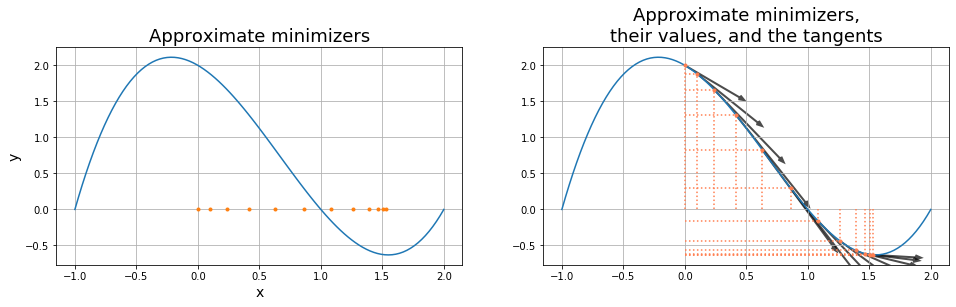

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))

ax = axs[0]
ax.plot(x, y)
ax.plot(approx, np.zeros(shape=approx.shape), '.')
ax.grid();
ax.set_title("Approximate minimizers", fontsize=18);
ax.set_xlabel("x", fontsize=14);
ax.set_ylabel("y", fontsize=14);

ax = axs[1]
ax.plot(x, y)
for x_0, y_0 in zip(approx, vals):
    ax.plot([x_0, x_0], [0., y_0], ':', color='coral')
    ax.plot([0., x_0], [y_0, y_0], ':', color='coral')
    ax.plot(x_0, y_0, '.', color='coral')
    
ax.quiver(approx, vals, np.ones(approx.shape), grads, angles='xy', scale=8., width=0.005, headwidth=3, headlength=4, alpha=.7)
ax.grid();
ax.set_title("Approximate minimizers,\ntheir values, and the tangents", fontsize=18);